# Install haversine


In [10]:
#!pip install plotly
#!pip install haversine
!pip install folium

# Imports e file upload


In [1]:
import pandas as pd
import haversine as hs
import numpy as np

# Read

In [38]:
df = pd.read_csv('D:/Estudos/Analise-de-dados/Projetos/datasets/train.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2.0,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2.0,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0.0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0.0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1.0,Snack,scooter,1,No,Metropolitian,(min) 30


# Limpeza de dados

In [45]:
# Limpeza dos dados para melhorar o uso da base de dados
# Conversão da coluna Delivery_person_Age de string para int
df['Delivery_person_Age'] = pd.to_numeric(df['Delivery_person_Age'],errors='coerce') # Converte a coluna 'delivery_person_age' para float e coloca 'NaN' para qualquer valor diferente de número
df.dropna(subset=['Delivery_person_Age'],inplace=True) # Remove as linhas que tiver 'NaN'
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype('int8') # Transforma o tipo de float para int8
# print(df['Delivery_person_Age'].dtypes)

# Conversão da coluna Delivery_person_Ratings de string para float
df['Delivery_person_Ratings'] = pd.to_numeric(df['Delivery_person_Ratings'],errors='coerce') # Converte a coluna 'delivery_person_ratings' para float e coloca 'NaN' para qualquer valor diferente de número
df.dropna(subset=['Delivery_person_Ratings'],inplace=True) # Remove as linhas que tiver 'NaN'
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype('float16') # Transforma o tipo de float para float16
# print(df['Delivery_person_Ratings'].dtypes)

# Conversão da coluna Order_Date de string para datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'],format='%d-%m-%Y')
# print(type(df['Order_Date'][0]))

# Conversão da coluna multiple_deliveries de string para int
df['multiple_deliveries'] = pd.to_numeric(df['multiple_deliveries'],errors = 'coerce') # Converte a coluna 'multiple_deliveries' para float e coloca 'NaN' para qualquer valor diferente de número
df.dropna(subset=['multiple_deliveries'], inplace=True) # Remove as linhas que tiver 'NaN'
df['multiple_deliveries'] = df['multiple_deliveries'].astype('int8') # Transforma de float para int8
# print(df['multiple_deliveries'].dtypes)

# Remover espaços em branco no final das strings de algumas colunas
df['ID'] = df['ID'].str.strip()
df['Road_traffic_density'] = df['Road_traffic_density'].str.strip()
df['Type_of_order'] = df['Type_of_order'].str.strip()
df['Type_of_vehicle'] = df['Type_of_vehicle'].str.strip()
df['City'] = df['City'].str.strip()
df['Festival'] = df['Festival'].str.strip()

# Remover NaN da coluna de City
df['City'] = df['City'].replace('NaN',np.nan)
df.dropna(subset=['City'], inplace=True)
print(df['City'].unique())

# remover NaN da coluna Weatherconditions
df.dropna(subset=['Weatherconditions'],inplace=True)

# Remover NaN da coluna road_traffic_density
df['Road_traffic_density'] = df['Road_traffic_density'].replace('NaN',np.nan)
df.dropna(subset=['Road_traffic_density'],inplace=True)

# transformar Time_taken(min) para número
df['Time_taken(min)'] = df['Time_taken(min)'].apply(lambda x: x.split('(min) ')[1])
df['Time_taken(min)'] = df['Time_taken(min)'].astype('int8')
print(df['ID'])

['Urban' 'Metropolitian' 'Semi-Urban']
0       0x4607
1       0xb379
2       0x5d6d
3       0x7a6a
4       0x70a2
         ...  
7748    0xb219
7749    0x8c17
7750    0xccee
7751    0x22d0
7753    0xbc0f
Name: ID, Length: 7061, dtype: object


# Primera Atividade


In [4]:
# Primeiras ativdades de dataframe
# 1. Qual o valor da informação armazenada na linha 30 e na coluna 10?
df.iloc[30, 10]

# 2. Selecione as linhas 0 a 20 e as colunas 0 a 2
df.iloc[0:21,0:3]

# 3. Selecione as linhas 5 até 30 e somente a coluna 'Delvery_person_Age'
df.loc[5:30,['Delivery_person_Age']]

# 4. Selecione as linhas 40 a 42 e as seguintes colunas: “Restaurant_latitude”,“Restaurant_longitude”, "Delivery_location_latitude”,“Delivery_location_longitude”
df.loc[40:42,['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude']]

# 5. Qual a menor data de entrega da coluna “Order_Date” entre as linhas 0 a 50?
aux = df.loc[:50,['Order_Date']]
aux.min()

# 6. Qual a menor data de entrega da coluna “ Time_Orderd ” entre as linhas 0 a 50?
aux = df.loc[:50,['Time_Orderd']]
aux.min()

# 7. Quais os nomes únicos da coluna “City” entre as linhas 50 e 70?
df.loc[50:70,'City'].unique().tolist()

# 8. Quais os nomes únicos da coluna “Weatherconditions” entre as linhas 0 e 10?
df.loc[:10,'Weatherconditions'].unique().tolist()

# 9. Quais os tipos de densidade de trânsito presente na coluna “Road_traffic_density ” entre as linhas 0 a 20?
df.loc[:20,'Road_traffic_density'].unique().tolist()

# 10. Qual o ID do entregador de comida mais velho entre as colunas 50 e 70?
aux = df.loc[50:70,['Delivery_person_Age']]
aux.max()

# 11. Qual o ID do entregador de comida com a melhor avaliação de entrega entre as colunas 50 e 70?
df1 = df.loc[50:70,['ID','Delivery_person_Ratings']]
df1.loc[df1['Delivery_person_Ratings'].idxmax(),'ID']

# 12. Quais os tipos de veículos utilizados pelos entregadores entre as linhas 0 a 30?
print(df.loc[:30,'Type_of_vehicle'].unique().tolist())

# 13. Quais os tipos de pedidos único que foram entregues entre as colunas 100 e 120?
df.loc[100:120,'Type_of_order'].unique().tolist()

['motorcycle', 'scooter', 'electric_scooter']


['Snack', 'Meal', 'Buffet', 'Drinks']

# Segunda Atividade

In [ ]:
# Mais atividades do uso de dataframes
# 1. Qual o número total de entregadores cadastrados na base de dados?
# delivery_people_count = df['Delivery_person_ID'].count()
# print(delivery_people_count)

# 2. Qual o número total de entregadores únicos cadastrados na base de dados?
# delivery_people_unique = df['Delivery_person_ID'].nunique()
# print(delivery_people_unique)

# 3. Qual a média de idade dos entregadores por cidade?
# print('Média agrupada por cidade\n',df.groupby('City')['Delivery_person_Age'].mean(),'\n')

# 4. Qual a mediana de idade dos entregadores por cidade?
# print('Mediana agrupada por cidade\n',df.groupby('City')['Delivery_person_Age'].median(),'\n')

# 5. Qual o número total de entregas feitas por densidade de tráfego?
# print('Quantidade de entregas realizadas por densidade de tráfego\n',df.groupby('Road_traffic_density')['ID'].count())

# 6. Qual a média das avaliações das entregas feitas por densidade de tráfego?
# print('Média de avaliações agrupada por densidade de tráfego\n',df.groupby('Road_traffic_density')['Delivery_person_Ratings'].mean())

# 7. Qual a quantidade de entregas feitas por cidade?
# print('Quantidade de entregas feitas por cidade\n',df.groupby('City')['ID'].count())

# 8. Qual a quantidade das entregas feitas por cidade e por tipo de veículo?
# print('Média de entregas feitas por cidade e tipo de veículo:')
# print(df.groupby(['City','Type_of_vehicle'])['ID'].count())

# 9. Qual o pedido mais antigo por cada cidade?
# print('Primeira data de entrega de cada cidade')
# print( df.groupby('City')['Order_Date'].min())

# 10. Qual a última data de entrega por cada cidade?
# print('Última data de entrega de cada cidade')
# print( df.groupby('City')['Order_Date'].max())

# 11. Qual a média de avaliações das entregas feitas por condições climáticas?
# print('Média das avaliações por condições climáticas')
# print(df.groupby('Weatherconditions')['Delivery_person_Ratings'].mean())

# 12. Qual o valor da avaliação mais baixa feita por tipo de condição climática e por densidade de tráfego?
# print('Menor avaliação por condição climática e densidade de tráfego')
# print(df.groupby(['Weatherconditions','Road_traffic_density'])['Delivery_person_Ratings'].min())

# 13. Quantas entregas foram feitas no Festival?
# festival_yes_count = df[df['Festival'] == 'Yes'].shape[0]
# print(f'Quantidade de entregas feitas no festival: {festival_count}')

# 14. Qual a avaliação média das entregas feitas no Festival?
# media_avaliacoes_festival_yes = df[df['Festival'] == 'Yes']['Delivery_person_Ratings'].mean()
# print(df[df['Festival'] == 'Yes']['Delivery_person_Ratings'])
# print(f'Média de avaliações das entregas feitas no festival: {media_avaliacoes_festival_yes:.2f}')

# 15.
# menor_avaliacao_por_cidade = df[df['Festival'] == 'Yes'].groupby('City')['Delivery_person_Ratings'].min()
# print(f'Menor avaliação por cidade: {menor_avaliacao_por_cidade:}')

# 16. Qual a maior avaliação feita por tipo de pedido?
# maior_avaliacao_por_tipo_pedido = df.groupby('Type_of_order')['Delivery_person_Ratings'].max()
# print(f'Maior avaliação por tipo de pedido:\n{maior_avaliacao_por_tipo_pedido}')

# 17. Qual a idade do entregador mais velho da planilha de dados?
# idade_entregador_mais_velho = df['Delivery_person_Age'].max()
# print(f'Idade do entregador mais velho: {idade_entregador_mais_velho}')

# 18. Qual a idade do entregador mais novo da planilha de dados?
# idade_entregador_mais_novo = df['Delivery_person_Age'].min()
# print(f'Idade do entregador mais velho: {idade_entregador_mais_velho}')

# 19. Quantas entregas foram feitas em cada condição climática?
# qtd_entregas_por_condicao_climatica = df.groupby('Weatherconditions')['ID'].count()
# print(f'Quantidade de entregas feitas em cada condição climática:\n{qtd_entregas_por_condicao_climatica}')

# 20.
# qtd_entregas_por_tipo_densidade_transito = df.groupby('Road_traffic_density')['ID'].count()
# print(f'Quantidade de entregas feitas por tipo de densidade de tráfego:\n{qtd_entregas_por_tipo_densidade_transito}')

Quantidade de entregas feitas por tipo de densidade de tráfego:
Road_traffic_density
High       732
Jam       2332
Low       2431
Medium    1757
NaN         12
Name: ID, dtype: int64


# Terceira atividade

     Delivery_person_ID week_of_year  qtd_deliveries
0       AGRRES010DEL01            07               3
1       AGRRES010DEL02            07               2
2       AGRRES010DEL03            06               1
3        AGRRES01DEL02            06               1
4        AGRRES01DEL02            07               1
...                 ...          ...             ...
3982     VADRES20DEL02            13               1
3983     VADRES20DEL02            14               2
3984     VADRES20DEL03            10               1
3985     VADRES20DEL03            11               1
3986     VADRES20DEL03            12               1

[3987 rows x 3 columns]


C:\Users\gugui\AppData\Local\Temp\ipykernel_4248\488667511.py:61: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


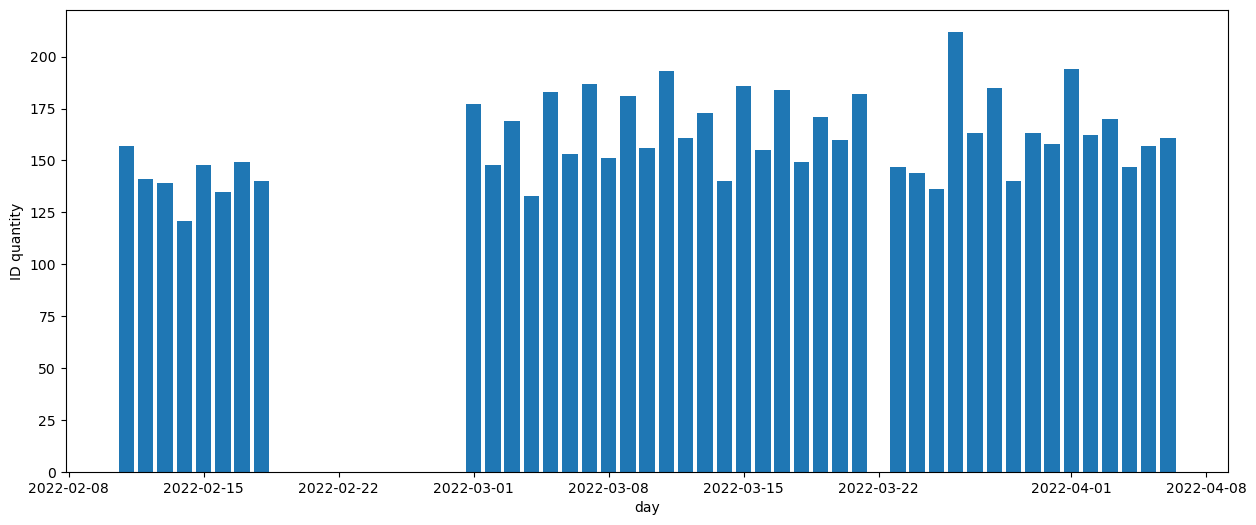

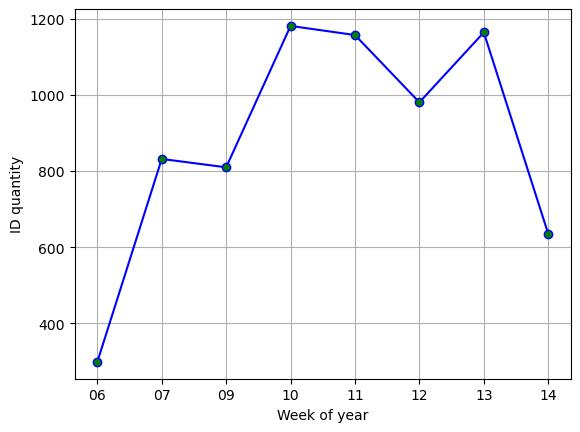

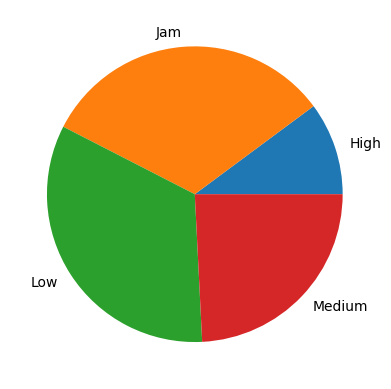

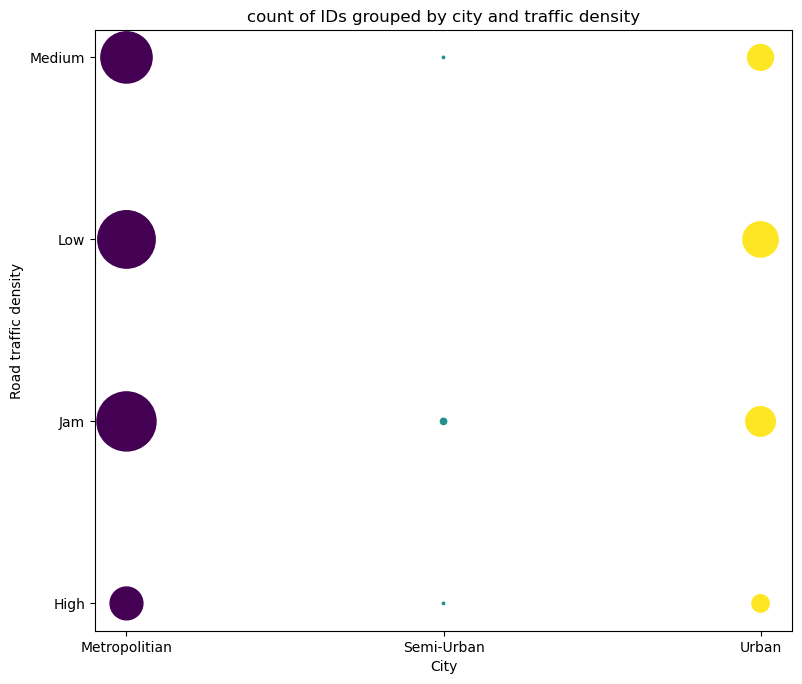

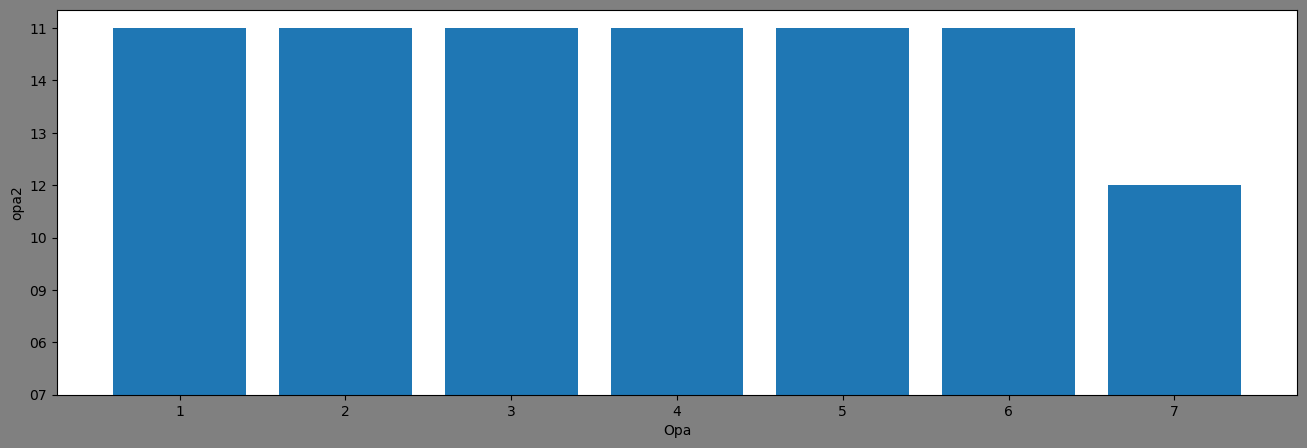

In [7]:
# import da biblioteca de graficos
# import plotly.express as px
import matplotlib.pyplot as plt
# 1. Qual a quantidade de pedidos feitos por dia?
aux = df.groupby('Order_Date')['ID'].count().reset_index()
# print(f'{aux}')
# px.bar(aux,x='Order_Date',y='ID
#aux['Order_date
plt.figure(figsize=(15,6))
plt.xlabel('day')
plt.ylabel('ID quantity')
plt.bar(aux['Order_Date'].values,aux['ID'])

# 2. Qual a quantidade de pedidos por semana?
# criar coluna week_of_year
df['week_of_year'] = df['Order_Date'].dt.strftime('%U') # cria a coluna 'week_of_year' e o dt.strftime('%U') elenca segunda-feira como o primeiro dia da semana
pedidos_por_semana = df.groupby('week_of_year')['ID'].count().reset_index()
# disclaimer: na base de dados só há informações do ano de 2022, caso existisse outro ano, uma coluna de ano deveria ser adcionada ao dataframe, para que o groupby seja por semana do ano e ano
# print(f'{pedidos_por_semana}')
#px.line(pedidos_por_semana,x='week_of_year',y='ID').show
plt.figure()
plt.xlabel('Week of year')
plt.ylabel('ID quantity')
plt.grid()
plt.plot(pedidos_por_semana['week_of_year'],pedidos_por_semana['ID'],marker='o',markerfacecolor='green',linestyle='-',color='blue')

# 3. Distribuição relativa dos IDs por densidade de tráfego
pedidos_por_tipo_de_trafego = df.groupby('Road_traffic_density')['ID'].count().reset_index()
soma_total = pedidos_por_tipo_de_trafego.sum()['ID']
percentual_relativo = pedidos_por_tipo_de_trafego['ID']/soma_total*100
pedidos_por_tipo_de_trafego['Percentual_relativo'] = percentual_relativo
# print(pedidos_por_tipo_de_trafego[['Road_traffic_density','Percentual_relativo']])
# px.pie(pedidos_por_tipo_de_trafego,names='Road_traffic_density',values='Percentual_relativo')
plt.figure()
plt.pie(percentual_relativo, labels=pedidos_por_tipo_de_trafego['Road_traffic_density'])

# 4. Volume de entregas por cidade e densidade de tráfego
qtd_pedidos_cidade_trafego = df.groupby(['City','Road_traffic_density'])['ID'].count().reset_index()
# print(qtd_pedidos_cidade_trafego)
# px.scatter(qtd_pedidos_cidade_trafego,x='City',y='Road_traffic_density',size='ID',color='City',log_x=True,size_max=60).show()
unique_cities = qtd_pedidos_cidade_trafego['City'].unique()
city_color_mapping = {city: i for i, city in enumerate(unique_cities)}
#print(city_color_mapping,type(city_color_mapping))
qtd_pedidos_cidade_trafego['colors'] = qtd_pedidos_cidade_trafego['City'].map(city_color_mapping)
#print(qtd_pedidos_cidade_trafego)
plt.figure(figsize=(9,7.8))
plt.ylabel('Road traffic density')
plt.xlabel('City')
plt.title('count of IDs grouped by city and traffic density')
plt.scatter(qtd_pedidos_cidade_trafego['City'],qtd_pedidos_cidade_trafego['Road_traffic_density'],s=qtd_pedidos_cidade_trafego['ID'],c=qtd_pedidos_cidade_trafego['colors'])

# 5. Quantidade de entregas de cada entregador por semana
qtd_entregas_por_entregador_por_semana = df.groupby(['Delivery_person_ID','week_of_year'])['ID'].count().reset_index()
qtd_entregas_por_entregador_por_semana.rename(columns={'ID':'qtd_deliveries'},inplace=True)
print(qtd_entregas_por_entregador_por_semana)

# Quarta atividade

In [99]:
# 1. Menor e maior idade dos entregadores
menor_idade = df['Delivery_person_Age'].min()
maior_idade = df['Delivery_person_Age'].max()
# print(f'Menor idade: {menor_idade}')
# print(f'Maior idade: {maior_idade}')

# 2.
pior_condicao = df['Vehicle_condition'].min()
melhor_condicao = df['Vehicle_condition'].max()
# print(f'Pior condição: {pior_condicao}')
# print(f'Melhor condição: {melhor_condicao}')

# 3. Media de avaliação por entregador
avaliacao_media_por_entregador = df.groupby('Delivery_person_ID')['Delivery_person_Ratings'].mean().reset_index()
# print(avaliacao_media_por_entregador)

# 4. Desvio padrão e média de avaliações por densidade de tráfego
avaliacao_media_por_densidade = df_without_NaN.groupby('Road_traffic_density')['Delivery_person_Ratings'].std().reset_index()
avaliacao_media_por_densidade['Media'] = df_without_NaN.groupby('Road_traffic_density')['Delivery_person_Ratings'].mean().reset_index()['Delivery_person_Ratings']
avaliacao_media_por_densidade.rename(columns={'Delivery_person_Ratings':'Desvio_Padrao'},inplace=True)
# print(avaliacao_media_por_densidade)

# 5. Desvio padrão e média de avaliações por condições climáticas
avaliacao_media_por_condicoes_climaticas = df_without_NaN.groupby('Weatherconditions')['Delivery_person_Ratings'].std().reset_index()
avaliacao_media_por_condicoes_climaticas['Media'] = df_without_NaN.groupby('Weatherconditions')['Delivery_person_Ratings'].mean().reset_index()['Delivery_person_Ratings']
avaliacao_media_por_condicoes_climaticas.rename(columns={'Delivery_person_Ratings':'Desvio_Padrao'},inplace=True)
# print(avaliacao_media_por_condicoes_climaticas)

# 6. Os dez entregadores mais rápidos
dez_mais_rapidos = df.nsmallest(10,'Time_taken(min)')
print(dez_mais_rapidos[['Delivery_person_ID','Time_taken(min)']])

# 7. Os dez entregadores mais lentos
dez_mais_lentos = df.nlargest(10,'Time_taken(min)')
print(dez_mais_lentos[['Delivery_person_ID','Time_taken(min)']])

    Delivery_person_ID  Time_taken(min)
36     PUNERES18DEL01                10
75      HYDRES13DEL03                10
378  RANCHIRES12DEL03                10
485     ALHRES08DEL03                10
611     ALHRES19DEL03                10
644    PUNERES12DEL01                10
746     SURRES08DEL03                10
750     HYDRES18DEL03                10
784     SURRES05DEL02                10
806     MYSRES18DEL01                10
     Delivery_person_ID  Time_taken(min)
188      MYSRES04DEL03                54
641     LUDHRES18DEL03                54
2373    CHENRES04DEL01                54
3103     JAPRES09DEL01                54
3711     MYSRES11DEL03                54
4585  RANCHIRES15DEL03                54
4649    PUNERES09DEL01                54
5061     MUMRES12DEL01                54
5442     JAPRES12DEL02                54
5596   COIMBRES16DEL02                54


# Quinta atividade - visão do restaurante

In [5]:
# Quantidade de entregadores únicos
qtd_entregadores_unicos = df['Delivery_person_ID'].nunique()
#print(f'Quantidade de entregadores únicos: {qtd_entregadores_unicos}')

# A distância média dos restaurantes e dos locais de entrega
cols = ['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude']
df['Distancia_entre_restaurante_entrega'] = df.loc[:,cols].apply( lambda x: hs.haversine((x['Restaurant_latitude'],x['Restaurant_longitude']),(x['Delivery_location_latitude'],x['Delivery_location_longitude'])),axis=1)
#print(df['Distancia_entre_restaurante_entrega'])

# Tempo médio e o desvio padrão de entregas por cidade
df_aux = pd.DataFrame()
df_aux['City'] = df['City'].unique()
df_aux['Media'] = df.groupby('City')['Time_taken(min)'].mean().reset_index()['Time_taken(min)']
df_aux['Desvio_padrao'] = df.groupby('City')['Time_taken(min)'].std().reset_index()['Time_taken(min)']
#print(df_aux)

# Tempo médio e desvio padrão de entregas por cidade e tipo de pedido
df_aux1 = df.groupby(['City','Type_of_order'])['Time_taken(min)'].mean().reset_index()
df_aux1.rename(columns={'Time_taken(min)':'Media'},inplace=True)
df_aux1['Desvio_padrao'] = df.groupby(['City','Type_of_order'])['Time_taken(min)'].std().reset_index()['Time_taken(min)']
#print(df_aux1)

# Tempo médio e desvio padrão de entregas por cidade e tipo de tráfego
df_aux2 = pd.DataFrame()
df_aux2 = df.groupby(['City','Road_traffic_density'])['Time_taken(min)'].mean().reset_index()
df_aux2.rename(columns={'Time_taken(min)':'Media'},inplace=True)
df_aux2['Desvio_padrao'] = df.groupby(['City','Road_traffic_density'])['Time_taken(min)'].std().reset_index()['Time_taken(min)']
print(df_aux2)

# Tempo médio de entrega durante períodos de festival
df_festival_on = df[df['Festival'] == 'Yes']
df_aux3 = df_festival_on['Time_taken(min)'].mean()
print(f'Tempo médio de entrega durante festival: {df_aux3:.2f}')

             City Road_traffic_density      Media  Desvio_padrao
0   Metropolitian                 High  28.267025       8.035292
1   Metropolitian                  Jam  31.886615       9.555296
2   Metropolitian                  Low  22.574020       7.051329
3   Metropolitian               Medium  28.047794       8.383640
4   Metropolitian                  NaN  21.666667       4.663690
5             NaN                 High  22.000000       6.771790
6             NaN                  Jam  24.196078      10.198077
7             NaN                  Low  19.623377       6.716122
8             NaN               Medium  24.770833       8.145589
9      Semi-Urban                 High  49.333333       3.511885
10     Semi-Urban                  Jam  50.238095       2.718543
11     Semi-Urban               Medium  47.666667       1.527525
12          Urban                 High  23.717949       8.484365
13          Urban                  Jam  27.736726      10.414010
14          Urban        

In [14]:
# localização mediana das longitudes e latitudes agrupadas por cidade e densidade de tráfego
import folium
df_aux = df.groupby(['City','Road_traffic_density'])['Delivery_location_latitude'].median().reset_index()
df_aux['median_longitude'] = df.groupby(['City','Road_traffic_density'])['Delivery_location_longitude'].median().reset_index()['Delivery_location_longitude']
df_aux.rename(columns={'Delivery_location_latitude':'median_latitude'},inplace=True)
map = folium.Map()

for i, location_info in df_aux.iterrows():
    folium.Marker([location_info['median_latitude'],
                 location_info['median_longitude']],
                 popup=location_info[['City','Road_traffic_density']]).add_to(map)

map

In [ ]:
df_aux = df['City']
print(df_aux)
df_aux = df['Time_taken(min)']
print(df_aux)